# 1. Exploración y Limpieza de Datos (EDA)


## 📦 Importación de librerías y Carga del dataset

In [68]:
# 📦 Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

# 📂 Carga del dataset
df = pd.read_csv("customer_dataset.csv")



## 👀 Vista general del dataset

In [69]:
# 👀 Vista general del dataset
df.head()


,cliente_id,genero,edad,pais,ciudad,segmento_de_cliente,meses_permanencia,canal_de_registro,tipo_contrato,conecciones_mensuales,...,tiempo_promedio_de_resolucion,tipo_de_queja,puntuacion_csates,escaladas,tasa_apertura_email,tasa_clics_marketing,puntuacion_nps,respuesta_de_la_encuesta,recuento_de_referencias,abandonar
0,CUST_00001,Masculino,68,Banglades,Londres,SME,22,Web,Mensual,26,...,13.354360,Servicio,4.0,0,0.71,0.40,27,Satisfecho,1,0
1,CUST_00002,Femenino,57,Canada,Sydney,Individual,9,Mobile,Mensual,7,...,25.140088,Facturacion,2.0,0,0.78,0.33,-19,Neutral,2,1
2,CUST_00003,Masculino,24,Alemania,New York,SME,58,Web,Anual,19,...,27.572928,Servicio,3.0,0,0.35,0.49,80,Neutral,1,0
3,CUST_00004,Masculino,49,Australia,Dhaka,Individual,19,Mobile,Anual,34,...,26.420822,Tecnico,5.0,1,0.83,0.15,100,Neutral,0,0
4,CUST_00005,Masculino,65,Banglades,Delhi,Individual,52,Web,Mensual,20,...,26.674579,Tecnico,4.0,0,0.65,0.44,21,Insatisfecho,1,0


In [70]:
df.shape


(10000, 32)

In [71]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cliente_id                     10000 non-null  object 
 1   genero                         10000 non-null  object 
 2   edad                           10000 non-null  int64  
 3   pais                           10000 non-null  object 
 4   ciudad                         10000 non-null  object 
 5   segmento_de_cliente            10000 non-null  object 
 6   meses_permanencia              10000 non-null  int64  
 7   canal_de_registro              10000 non-null  object 
 8   tipo_contrato                  10000 non-null  object 
 9   conecciones_mensuales          10000 non-null  int64  
 10  dias_activos_semanales         10000 non-null  int64  
 11  promedio_coneccion             10000 non-null  float64
 12  caracteristicas_usadas         10000 non-null  

## 📊 Estadísticas descriptivas

In [72]:
# 📊 Estadísticas descriptivas

df.describe()


,edad,meses_permanencia,conecciones_mensuales,dias_activos_semanales,promedio_coneccion,caracteristicas_usadas,tasa_crecimiento_uso,ultima_coneccion,cuota_mensual,ingresos_totales,errores_de_pago,tickets_de_soporte,tiempo_promedio_de_resolucion,puntuacion_csates,escaladas,tasa_apertura_email,tasa_clics_marketing,puntuacion_nps,recuento_de_referencias,abandonar
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000
mean,45.906100,30.155700,19.672000,3.479400,15.187890,4.990800,0.019423,9.505200,34.930000,1057.018000,0.501000,1.206600,23.953210,3.486700,0.294100,0.499610,0.253575,19.110500,0.9922,0.102100
std,16.420416,17.099517,9.838003,2.302283,6.830774,2.211607,0.149567,9.799417,23.785115,1020.148233,0.711934,1.104554,9.956999,0.978631,0.543171,0.231601,0.140532,38.936619,0.9939,0.302795
min,18.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-0.580000,0.000000,10.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.100000,0.010000,-100.000000,0.0000,0.000000
25%,32.000000,16.000000,13.000000,1.000000,10.391645,3.000000,-0.080000,2.000000,20.000000,340.000000,0.000000,0.000000,17.082041,3.000000,0.000000,0.300000,0.130000,-7.000000,0.0000,0.000000
50%,46.000000,30.000000,20.000000,3.000000,15.161659,5.000000,0.020000,6.000000,30.000000,720.000000,0.000000,1.000000,23.950444,4.000000,0.000000,0.500000,0.250000,19.000000,1.0000,0.000000
75%,60.000000,45.000000,26.000000,5.000000,19.882034,6.000000,0.120000,13.000000,50.000000,1440.000000,1.000000,2.000000,30.758480,4.000000,1.000000,0.700000,0.380000,46.000000,2.0000,0.000000
max,74.000000,59.000000,54.000000,7.000000,41.996411,15.000000,0.540000,80.000000,100.000000,5900.000000,5.000000,7.000000,61.821878,5.000000,4.000000,0.900000,0.500000,100.000000,7.0000,1.000000


Esto permite ver:

rangos

valores extremos

posibles errores (ej: uso negativo, meses exagerados)

In [73]:
# 🔍 Valores nulos
df.isnull().sum()


,0
cliente_id,0
genero,0
edad,0
pais,0
ciudad,0
segmento_de_cliente,0
meses_permanencia,0
canal_de_registro,0
tipo_contrato,0
conecciones_mensuales,0


## 🎯 Variable objetivo (Churn)

In [74]:
# 🎯 Variable objetivo (Churn)

df["abandonar"].value_counts()


,count
abandonar,
0,8979
1,1021


In [75]:
df["abandonar"].value_counts(normalize=True)


,proportion
abandonar,
0,0.8979
1,0.1021


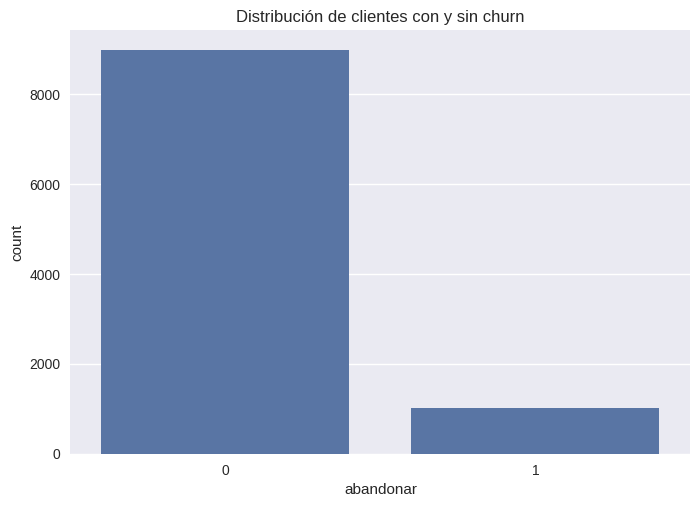

In [76]:
sns.countplot(x="abandonar", data=df)
plt.title("Distribución de clientes con y sin churn")
plt.show()


👉 Esto es muy importante para el speech:

dataset balanceado o desbalanceado

impacto en el modelo

## 🧹 Limpieza básica

In [77]:
# 🧹 Limpieza básica (si aplica)

# eliminar duplicados
df = df.drop_duplicates()

# ejemplo: convertir variables categóricas a minúsculas
df["cliente_id"] = df["cliente_id"].str.lower()
df["genero"] = df["genero"].str.lower()
df["pais"] = df["pais"].str.lower()
df["ciudad"] = df["ciudad"].str.lower()
df["segmento_de_cliente"] = df["segmento_de_cliente"].str.lower()
df["canal_de_registro"] = df["canal_de_registro"].str.lower()
df["tipo_contrato"] = df["tipo_contrato"].str.lower()
df["metodo_de_pago"] = df["metodo_de_pago"].str.lower()
df["descuento_aplicado"] = df["descuento_aplicado"].str.lower()
df["aumento_ultimos_3_meses"] = df["aumento_ultimos_3_meses"].str.lower()
df["tipo_de_queja"] = df["tipo_de_queja"].str.lower()
df["respuesta_de_la_encuesta"] = df["respuesta_de_la_encuesta"].str.lower()



In [78]:
df.head()

,cliente_id,genero,edad,pais,ciudad,segmento_de_cliente,meses_permanencia,canal_de_registro,tipo_contrato,conecciones_mensuales,...,tiempo_promedio_de_resolucion,tipo_de_queja,puntuacion_csates,escaladas,tasa_apertura_email,tasa_clics_marketing,puntuacion_nps,respuesta_de_la_encuesta,recuento_de_referencias,abandonar
0,cust_00001,masculino,68,banglades,londres,sme,22,web,mensual,26,...,13.354360,servicio,4.0,0,0.71,0.40,27,satisfecho,1,0
1,cust_00002,femenino,57,canada,sydney,individual,9,mobile,mensual,7,...,25.140088,facturacion,2.0,0,0.78,0.33,-19,neutral,2,1
2,cust_00003,masculino,24,alemania,new york,sme,58,web,anual,19,...,27.572928,servicio,3.0,0,0.35,0.49,80,neutral,1,0
3,cust_00004,masculino,49,australia,dhaka,individual,19,mobile,anual,34,...,26.420822,tecnico,5.0,1,0.83,0.15,100,neutral,0,0
4,cust_00005,masculino,65,banglades,delhi,individual,52,web,mensual,20,...,26.674579,tecnico,4.0,0,0.65,0.44,21,insatisfecho,1,0


# 2. Ingeniería de Features
En esta etapa se crean nuevas variables a partir de los datos originales, con el objetivo de capturar patrones de comportamiento asociados a la cancelación del servicio (churn).

Revisión rápida de columnas

In [79]:
df.columns


Index(['cliente_id', 'genero', 'edad', 'pais', 'ciudad', 'segmento_de_cliente',
       'meses_permanencia', 'canal_de_registro', 'tipo_contrato',
       'conecciones_mensuales', 'dias_activos_semanales', 'promedio_coneccion',
       'caracteristicas_usadas', 'tasa_crecimiento_uso', 'ultima_coneccion',
       'cuota_mensual', 'ingresos_totales', 'metodo_de_pago',
       'errores_de_pago', 'descuento_aplicado', 'aumento_ultimos_3_meses',
       'tickets_de_soporte', 'tiempo_promedio_de_resolucion', 'tipo_de_queja',
       'puntuacion_csates', 'escaladas', 'tasa_apertura_email',
       'tasa_clics_marketing', 'puntuacion_nps', 'respuesta_de_la_encuesta',
       'recuento_de_referencias', 'abandonar'],
      dtype='object')

🧩 Feature 1 — Cliente antiguo vs nuevo

🧩 Feature 2 — Intensidad de uso baja

🧩 Feature 3 — Actividad semanal baja

🧩 Feature 4 — Riesgo por errores de pago

🧩 Feature 5 — Cliente con fricción en soporte

🧩 Feature Temporales — ultima_coneccion

🧩 Feature 6 — NPS bajo

🧩 Feature 7 — Bajo engagement marketing

In [80]:
# Feature 1 — Cliente antiguo vs nuevo

df["cliente_antiguo"] = (df["meses_permanencia"] >= 12).astype(int)


#📌 Clientes nuevos tienden a abandonar más.


In [81]:
#Feature 2 — Intensidad de uso baja

df["uso_bajo"] = (
    df["conecciones_mensuales"] < df["conecciones_mensuales"].median()
).astype(int)

In [82]:
# Feature 3 — Actividad semanal baja
df["actividad_baja"] = (
    df["dias_activos_semanales"] < df["dias_activos_semanales"].median()
).astype(int)

In [83]:
# Feature 4 — Riesgo por errores de pago
df["riesgo_pago"] = (df["errores_de_pago"] > 0).astype(int)


#📌 Feature crítica para churn.

In [84]:
# Feature 5 — Cliente con fricción en soporte
df["alto_soporte"] = (
    (df["tickets_de_soporte"] > df["tickets_de_soporte"].median()) |
    (df["escaladas"] > 0)
).astype(int)

In [85]:
# Features temporales (muy bien vistas 👀)

#Convertimos ultima_coneccion:

df["ultima_coneccion"] = pd.to_datetime(df["ultima_coneccion"])
df["dias_desde_ultima_coneccion"] = (
    pd.Timestamp.today() - df["ultima_coneccion"]
).dt.days


df["inactivo_reciente"] = (df["dias_desde_ultima_coneccion"] > 14).astype(int)
#📌 Clientes inactivos = alto riesgo.

In [86]:
# Feature 6 — NPS bajo

#NPS -> qué tan probable es que un cliente recomiende el servicio a otra persona.

df["nps_bajo"] = (df["puntuacion_nps"] < 6).astype(int)



In [87]:
# Feature 7 — Bajo engagement marketing

df["engagement_bajo"] = (
    (df["tasa_apertura_email"] < df["tasa_apertura_email"].median()) &
    (df["tasa_clics_marketing"] < df["tasa_clics_marketing"].median())
).astype(int)



In [88]:
# Feature estrella ⭐ — Risk Score explicable

df["risk_score"] = (
    df["uso_bajo"] +
    df["actividad_baja"] +
    df["riesgo_pago"] +
    df["alto_soporte"] +
    df["inactivo_reciente"] +
    df["nps_bajo"]
)

# 📌 Interpretación clara:

# 0–1 → bajo riesgo

# 2–3 → riesgo medio

# 4+ → alto riesgo

## Encoding de variables categóricas (solo las necesarias)

In [89]:
categoricas = [
    "genero",
    "segmento_de_cliente",
    "canal_de_registro",
    "tipo_contrato",
    "metodo_de_pago",
    "tipo_de_queja",
    "respuesta_de_la_encuesta"
]

df = pd.get_dummies(df, columns=categoricas, drop_first=True)


## Selección final de features

In [90]:
df_model = df.drop(columns=[
    "cliente_id",
    "pais",
    "ciudad",
    "ultima_coneccion"
])


In [91]:
# Separación final:

X = df_model.drop(columns=["abandonar"])
y = df_model["abandonar"]



## Validación final

Se crean variables que reflejan uso, actividad, fricción operativa, percepción del cliente y señales temporales, permitiendo al modelo anticipar el abandono con base en comportamiento real

In [92]:
X.shape


(10000, 43)

In [93]:
X.head()


,edad,meses_permanencia,conecciones_mensuales,dias_activos_semanales,promedio_coneccion,caracteristicas_usadas,tasa_crecimiento_uso,cuota_mensual,ingresos_totales,errores_de_pago,...,canal_de_registro_referral,canal_de_registro_web,tipo_contrato_mensual,tipo_contrato_trimestral,metodo_de_pago_tarjeta,metodo_de_pago_transferencia bancarias,tipo_de_queja_servicio,tipo_de_queja_tecnico,respuesta_de_la_encuesta_neutral,respuesta_de_la_encuesta_satisfecho
0,68,22,26,7,11.762372,5,0.06,30,660,1,...,False,True,True,False,False,False,True,False,False,True
1,57,9,7,5,26.846390,1,-0.28,30,270,1,...,False,False,True,False,True,False,False,False,True,False
2,24,58,19,5,23.380065,6,0.13,20,1160,2,...,False,True,False,False,True,False,True,False,True,False
3,49,19,34,7,24.243136,2,-0.17,30,570,0,...,False,False,False,False,False,True,False,True,True,False
4,65,52,20,6,18.872323,2,-0.16,50,2600,0,...,False,True,True,False,False,False,False,True,False,False


In [94]:
df_model.to_csv("dataset_churn_features.csv", index=False, decimal=',')

from google.colab import files

files.download("dataset_churn_features.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>